## DSP LAB ASSIGNMENT 3

In [1]:
#Necessary imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy.integrate import quad
import cmath
import warnings;
warnings.simplefilter('ignore')

### Q.1.
#### Find the Fourier series associated with the function
 $$ f(x) =\begin{cases} 
    0 & \text{$-\pi \leq$ $x$ <0}\\ 
    \pi - x & \text{0 $\leq$ $x$ $\leq \pi$ }\\ 
    \end{cases} $$
#### Write a function to determine the coefficients a0, an, and bn. Plot the magnitude of the coefficients with |an| in blue colour and |bn| in red colour.

####  Fourier series representation of f(t):
$$f(t) = \frac{a_0}{2} + \sum_{n = 1}^{\infty}\Big(a_ncos(\frac{2\pi}{T}nt)+b_nsin(\frac{2\pi}{T}nt)\Big)$$
$$Where,a_0 = \frac{2}{T}\int_Tf(t)dt$$


$$a_n = \frac{2}{T}\int_Tf(t)cos(\frac{2\pi}{T}nt)dt$$


$$b_n = \frac{2}{T}\int_Tf(t)sin(\frac{2\pi}{T}nt)dt$$

##### The Fourier Series coefficients obtained are:
##### $a_0/2 = \frac{\pi}{4}$
##### $a_n = \frac{2}{\pi n^2}(1 - (-1)^n)$ , $n \ge 1$
##### $b_n = \frac{1}{n}$, $n \ge 1$

DC=a0/2= 0.7853981633974483
an= [ 6.36619772e-01  1.66533454e-16  7.07355303e-02 -1.31838984e-16
  2.54647909e-02 -9.93923338e-17  1.29922403e-02 -4.51028104e-17
  7.85950336e-03 -1.23688238e-16]
bn= [1.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714 0.125      0.11111111 0.1       ]


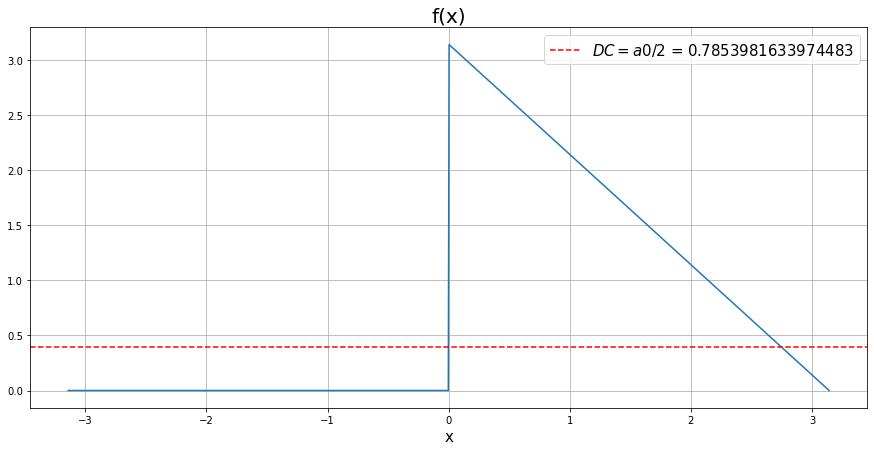

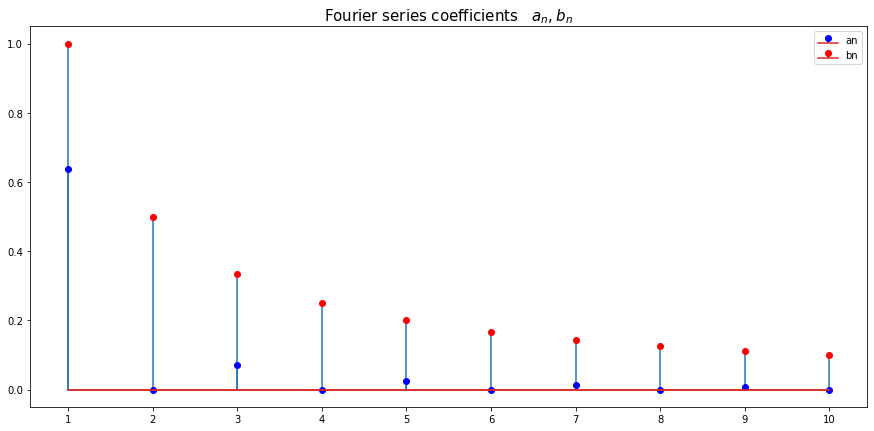

In [2]:
def q1_fn(x):
    return (np.pi-x)*(0 <= x <= np.pi)
    
def fourier(ll,ul,n,f):
    l=(ul-ll)/2
    a0=1/l*quad(lambda x: f(x),ll,ul)[0]
    an=np.zeros((n))
    bn=np.zeros((n))
    for i in range(1,n+1):
        an[i-1]=1/l*quad(lambda x: f(x)*np.cos(i*np.pi*x/l),ll,ul)[0]
        bn[i-1]=1/l*quad(lambda x: f(x)*np.sin(i*np.pi*x/l),ll,ul)[0]
    return [a0/2, an, bn]

li=-np.pi
lf=np.pi
n=10
coeff=fourier(li,lf,n,q1_fn)
dca0=(coeff[0])
an=(coeff[1])
bn=(coeff[2])
print('DC=a0/2=',dca0)
print('an=',an)
print('bn=',bn)

x = np.linspace(-np.pi ,np.pi,1000 )
f = (np.pi - x) * (x>=0)
plt.figure(figsize = (15,7))
plt.plot(x,f)
plt.grid()
plt.title('f(x)' , size= 20)
plt.xlabel('x' , size = 15 )
plt.axhline(dca0/2 , ls = '--' , c = 'r' , label = f'$DC=a0/2$ = {dca0}')
plt.legend(prop = {'size':15})
plt.show()
 
#plotting coeff an ,bn
plt.figure(figsize = (15,7))
plt.stem(np.arange(1,11),coeff[1],markerfmt='bo',label='an')
plt.stem(np.arange(1,11),coeff[2],markerfmt='ro',label='bn')
plt.xticks(np.arange(1,11))
plt.title('Fourier series coefficients   $a_n ,b_n$' , size= 15)
plt.legend()
plt.show()

### Q.2.
#### The saw-tooth wave f is shown in Figure 1:
#### (a) For the saw-tooth wave f, compute the Fourier series on the interval [-1,1]. Plot the magnitude of the coefficients
#### (b) For the Fourier series expression in (a), plot the partial sum of order  3 with red colour and the original saw-tooth wave f with blue colour. Compare the results on the same plot.
#### (c) Plot the partial sum of order 9 for the saw-tooth function with green colour and the original saw-tooth wave f with blue colour.
#### The plots obtained for (b) and (c) must be shown in different subplots and you should be able to explain your observation.

a0= 2.2210637634541766e-17
an= [ 8.10569469e-01 -6.82342334e-18  9.00632743e-02 -2.84890622e-17
  3.24227788e-02  2.68995281e-19  1.65422341e-02  1.27262082e-16
  1.00070305e-02  1.66839155e-17]
bn= [ 1.98107817e-17 -1.34529805e-17 -2.31565816e-17 -1.58058289e-17
 -6.96556078e-17  7.11882679e-17 -6.27441202e-17  2.95883748e-17
  3.75165917e-17 -4.26803618e-17]


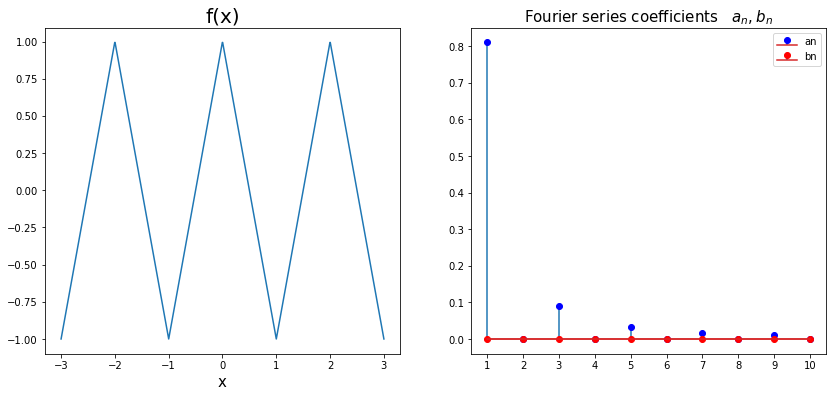

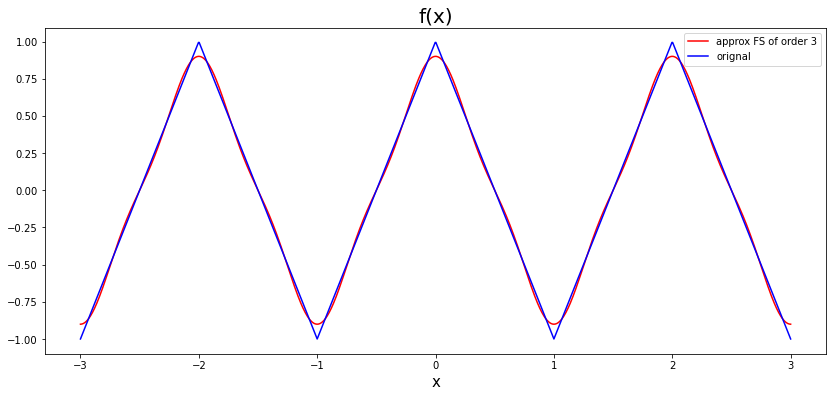

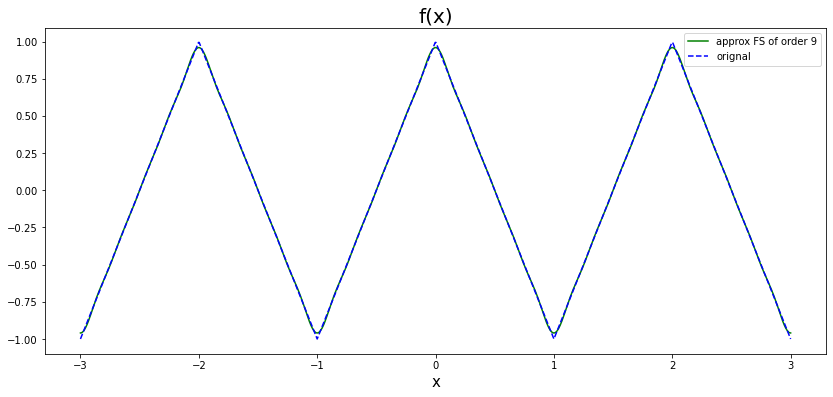

In [3]:
from scipy.signal import sawtooth


#fn for ip
def sawtoothfunc(x):
    st=sawtooth(2*np.pi*(x-1)*1.5/L,width=0.5)
    return st

#fn for partial sum
def fourier_sum(f,n):
    l=(ul-ll)/2
    coeff=fourier(ll,ul,n,f)
    a0=coeff[0]
    an=coeff[1]
    bn=coeff[2]
    sawt_csum=a0/2
    for i in range(1,n+1):
        sawt_csum=sawt_csum+(an[i-1]*np.cos(i*np.pi*x_st/l))+(bn[i-1]*np.sin(i*np.pi*x_st/l))
    return sawt_csum

#variables
L=3
ll=-1
ul=1
sam=1000

#calculating coeff
sawt_coeff=fourier(-1,1,10,sawtoothfunc)
sawt_a0=(sawt_coeff[0])
sawt_an=(sawt_coeff[1])
sawt_bn=(sawt_coeff[2])
print('a0=',sawt_a0)
print('an=',sawt_an)
print('bn=',sawt_bn)


#plotting ip fn
x_st=np.linspace(-L,L,sam)
y_st=sawtoothfunc(x_st)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(x_st,y_st)
plt.title('f(x)' , size= 20)
plt.xlabel('x' , size = 15 )
#plt.legend()

#plotting coeff
plt.subplot(122)
plt.stem(np.arange(1,11),sawt_coeff[1],markerfmt='bo',label='an')
plt.stem(np.arange(1,11),sawt_coeff[2],markerfmt='ro',label='bn')
plt.xticks(np.arange(1,11))
plt.legend()
plt.title('Fourier series coefficients   $a_n ,b_n$' , size= 15)
plt.show()



##plotting ip fn and partial sum of order 3
plt.figure(figsize=(14,6))
#plt.subplot(121) 
plt.plot(x_st,fourier_sum(sawtoothfunc,3),'r',label='approx FS of order 3')
plt.plot(x_st,y_st,'b',label='orignal')
plt.title('f(x)' , size= 20)
plt.legend()
plt.xlabel('x' , size = 15 )
plt.show()
##plotting ip fn and partial sum of order 9
#plt.subplot(122)
plt.figure(figsize=(14,6))
plt.plot(x_st,fourier_sum(sawtoothfunc,9),'green',label='approx FS of order 9')
plt.plot(x_st,y_st,'b--',label='orignal')
plt.title('f(x)' , size= 20)
plt.xlabel('x' , size = 15 )
plt.legend()
plt.show()


#### From above it is evident that signal can be reconstructed effectively with fourier coefficients. The more the number , the more closer generated signal is approximated to original signal,Gibbs Phenomenon

### Q.3.
#### The Fourier transform is given by
#### $$ X(\omega) = \int_{0}^{\infty} x(t) e^{-j\omega t} dt $$
#### Write your custom function which takes input from the below given signals and computes the magnitude and phase spectra (a > 0). Sketch x(t), |X(ω)|, and ∠X(ω) when A = 2 and a = 4.
#### (a) $$ x(t) = \begin{cases} 
    Ae^{-at} & \text{$t \geq 0$}\\ 
    0& \text{$ t <0$ }\\ 
    \end{cases} $$
#### (b) $$ x(t) = Ae^{-a|t|} $$

In [4]:
#fn for fourier tf
def FT(f , W , lmts = [-inf,inf]):
    l,h = lmts
    re = []
    im = [] 
    for i in W:
        re.append(quad(eval('lambda t:' + f +f'* np.real(cmath.exp(-1j *{i}*t))') , l,h)[0])
        im.append(quad(eval('lambda t:' + f +f'* np.imag(cmath.exp(-1j *{i}*t))') , l,h)[0])         
    mag = np.sqrt(np.power(re,2)+np.power(im,2))
    ph = np.arctan2(im,re)
    return mag , ph
    

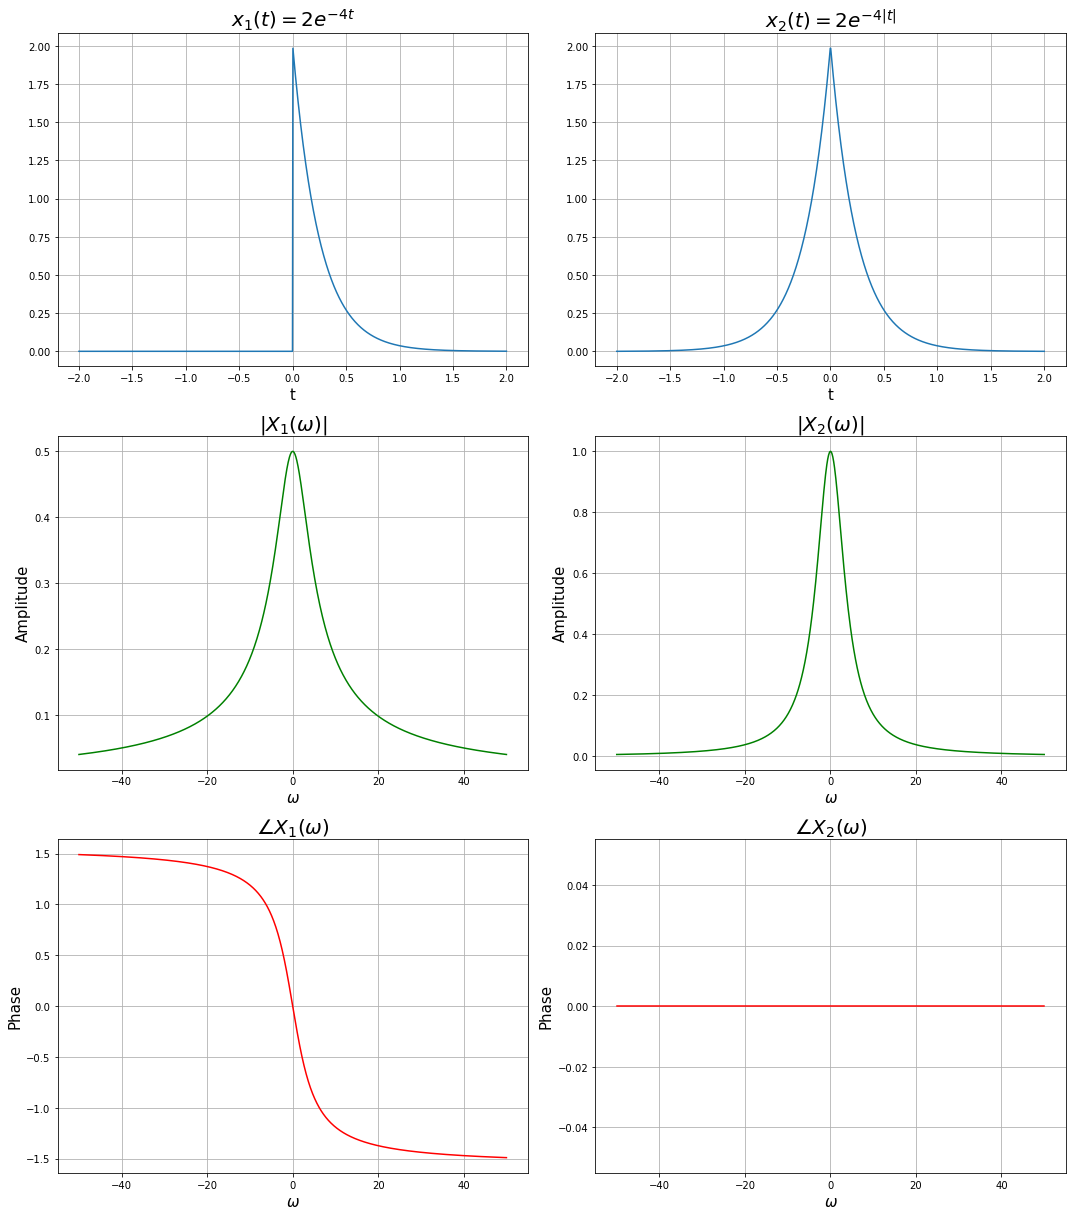

In [5]:
W = np.linspace(-50,50,1000)
x3 = np.linspace(-2,2,1000)
A,a = 2,4

#x1
q3a_fn = A*(x>=0)*np.exp(-1*a*x3)
#x2
q3b_fn = A*np.exp(-1*a*np.abs(x3))


#FT(X1)
fn_x1 = '2*np.exp(-4*t)'
mag_x1 , phs_x1 = FT(fn_x1,W,[0,inf])
#FT(X2)
fn_x2 = '2*np.exp(-4*abs(t))'
mag_x2 , phs_x2 = FT(fn_x2,W)


#plotting
plt.figure(figsize = (15,17))
#plot X1
plt.subplot(321)
plt.plot(x3,q3a_fn)
plt.title(r'$x_1(t) = 2e^{-4t}$' , size= 20)
plt.xlabel('t' , size = 15)
plt.grid()
#plot X2
plt.subplot(322)
plt.plot(x3,q3b_fn)
plt.title(r'$x_2(t) = 2e^{-4|t|}$'  , size= 20)
plt.xlabel('t' , size = 15)
plt.grid()
#FT(X1) magnitude plot
plt.subplot(323)
plt.plot(W,mag_x1,'g')
plt.title(r'$|X_1(\omega)|$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
plt.ylabel('Amplitude', size = 15)
plt.grid()
#FT(X1) Phase plot
plt.subplot(325)
plt.plot(W,phs_x1,'r')
plt.title(r'$\angle X_1(\omega)$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
plt.ylabel('Phase', size = 15)
plt.grid()
#FT(X2) magnitude plot
plt.subplot(324)
plt.plot(W,mag_x2,'g')
plt.title(r'$|X_2(\omega)|$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
plt.ylabel('Amplitude', size = 15)
plt.grid()
#FT(X2) Phase plot
plt.subplot(326)
plt.plot(W,phs_x2,c = 'r')
plt.title(r'$\angle X_2(\omega)$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
plt.ylabel('Phase', size = 15)
plt.grid()
plt.tight_layout()



### Q.4.
#### Determine and sketch $X_R(ω), X_I (ω)$, |X(ω)|, and ∠X(ω) for the Fourier transform:
$$ X(\omega) = \frac{1}{1-ae^{-j\omega}}  -1 \leq a \leq 1 $$
#### Show the graphical representation of the spectra for a = 0.8

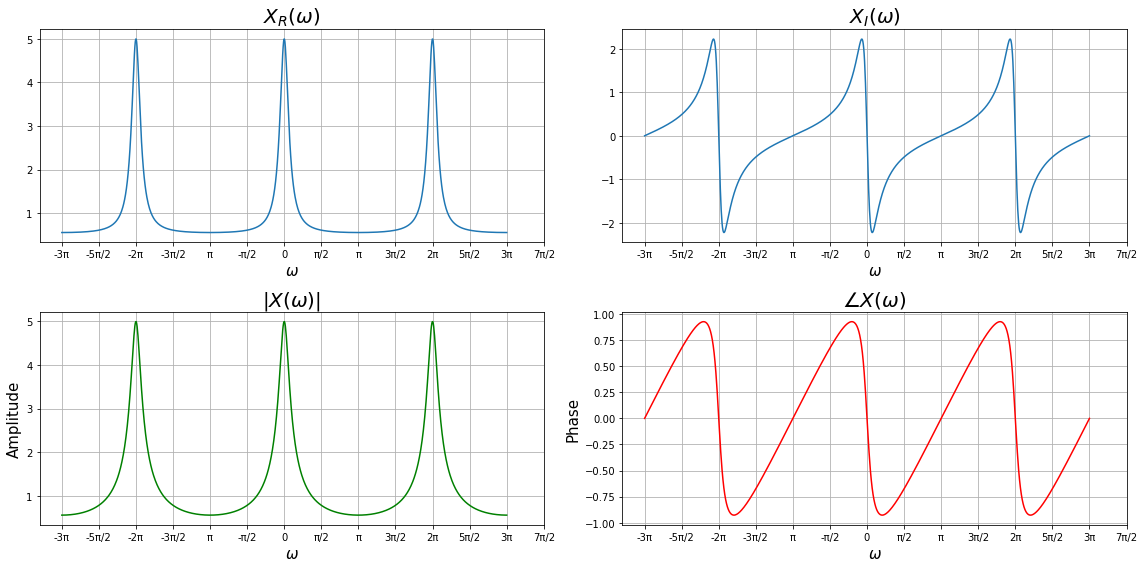

In [6]:
#def x(w)
def f4(w,a):
    if -1<=a<=1:
        xw=1/(1-a*np.exp(-1j*w))
    else:
        xw=0
    return xw

#w1,Xw 
w1 = np.linspace(-3*np.pi,3*np.pi,1000)
Xw=f4(w1,0.8)

#plotting
plt.figure(figsize=(16,8))
#plotting real part x(w)
plt.subplot(221)
plt.plot(w1,Xw.real)
plt.title(r'$X_R(\omega)$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
theta = np.arange(-3 * pi, 3 * pi+pi/2, step=(pi / 2))
plt.xticks(theta, ['-3π','-5π/2','-2π', '-3π/2', 'π', '-π/2', '0', 'π/2', 'π', '3π/2', '2π','5π/2','3π','7π/2'])
plt.grid()
#plotting img part x(w)
plt.subplot(222)
plt.plot(w1,Xw.imag)
plt.title(r'$X_I(\omega)$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
theta = np.arange(-3 * pi, 3 * pi+pi/2, step=(pi / 2))
plt.xticks(theta, ['-3π','-5π/2','-2π', '-3π/2', 'π', '-π/2', '0', 'π/2', 'π', '3π/2', '2π','5π/2','3π','7π/2'])
plt.grid()
#plotting magnitude of x(w)
plt.subplot(223)
plt.plot(w1,abs(Xw),c = 'g')
plt.title(r'$|X(\omega)|$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
plt.ylabel('Amplitude', size = 15)
theta = np.arange(-3 * pi, 3 * pi+pi/2, step=(pi / 2))
plt.xticks(theta, ['-3π','-5π/2','-2π', '-3π/2', 'π', '-π/2', '0', 'π/2', 'π', '3π/2', '2π','5π/2','3π','7π/2'])
plt.grid()
#plotting phase of x(w)
plt.subplot(224)
plt.plot(w1,np.angle(Xw),c = 'r')
plt.title(r'$\angle X(\omega)$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
plt.ylabel('Phase', size = 15)
theta = np.arange(-3 * pi, 3 * pi+pi/2, step=(pi / 2))
plt.xticks(theta, ['-3π','-5π/2','-2π', '-3π/2', 'π', '-π/2', '0', 'π/2', 'π', '3π/2', '2π','5π/2','3π','7π/2'])
plt.grid()
plt.tight_layout()

### Q.5.
#### Determine the Fourier transform of the signal: $ x(n) = a^{|n|} $
#### Plot x(n) and X(ω) with a = 0.6.

In [7]:
#fn for Discrte Time Fourier Transform(DTFT)

def Dis_4_trans(f,x): # function to calculate DTFT
    xw = np.arange(-3*np.pi,3*np.pi,0.001)
    real = np.zeros_like(xw)
    imag = np.zeros_like(xw)
    for i in range(len(xw)):
        real[i] = np.sum(f * np.cos(- xw[i] * x)) 
        imag[i] = np.sum(f * np.sin(- xw[i] * x))     
    return xw, real, imag


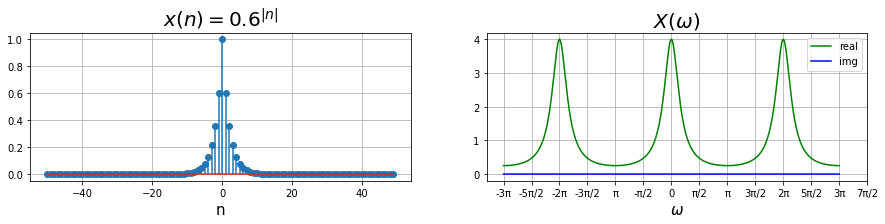

In [8]:
import matplotlib.ticker as tck
n=np.arange(-50,50)
q5_fn = np.power(0.6,abs(n))
def q5fun(n):
    return 0.6**abs(n)
xw5, real, imag = Dis_4_trans(q5_fn,n)

#plotting fn
plt.figure(figsize = (15,6))
plt.subplot(221)
plt.stem(n,q5fun(n))
plt.title(r'$x(n) = 0.6^{|n|}$' , size= 20)
plt.xlabel('n' , size = 15)
plt.grid()
#FT(X)  plot
plt.subplot(222)
plt.plot(xw5,real,'g',label='real')
plt.plot(xw5,imag,'b',label='img')
plt.title(r'$X(\omega)$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
theta = np.arange(-3 * pi, 3 * pi+pi/2, step=(pi / 2))
plt.xticks(theta, ['-3π','-5π/2','-2π', '-3π/2', 'π', '-π/2', '0', 'π/2', 'π', '3π/2', '2π','5π/2','3π','7π/2'])
plt.legend()
plt.grid()


### Q.6. 
#### (a) Generate 3 sine waves with frequencies 2 Hz, 5 Hz, and 8 Hz, having amplitudes of 3, 2, and 1,  espectively, and all phases as zeros. Add the 3 sine waves together with a sampling rate fs = 100 Hz. Plot the resultant signal for a time duration of 1 sec.
#### (b) Write a function for discrete Fourier transform (DFT) as DFT(x) which takes in an input argument x, which is a 1-dimensional realvalued signal. The function has to calculate the DFT of the signal and return the DFT values. Apply this function to the signal generated in (a) and plot the result. Verify that the output of the DFT is symmetric.
#### (c) Filter out the DFT results to obtain only the frequency components of (a) and plot the resultant. That is, filter the frequency components which is greater than fs/2.

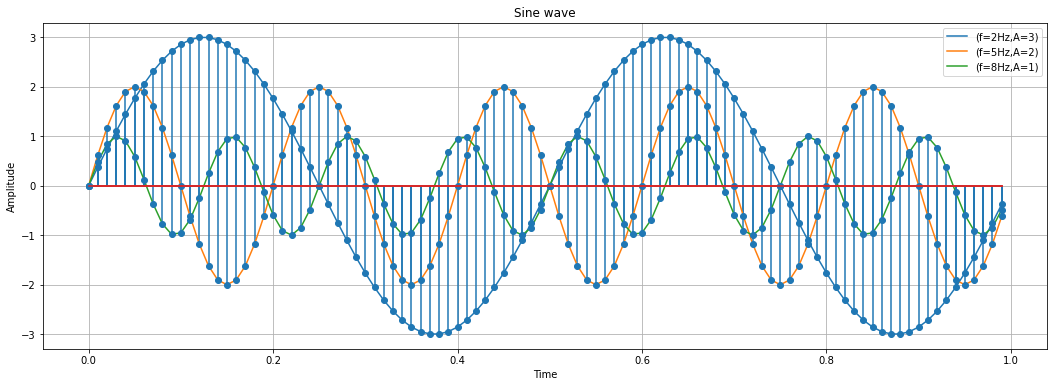

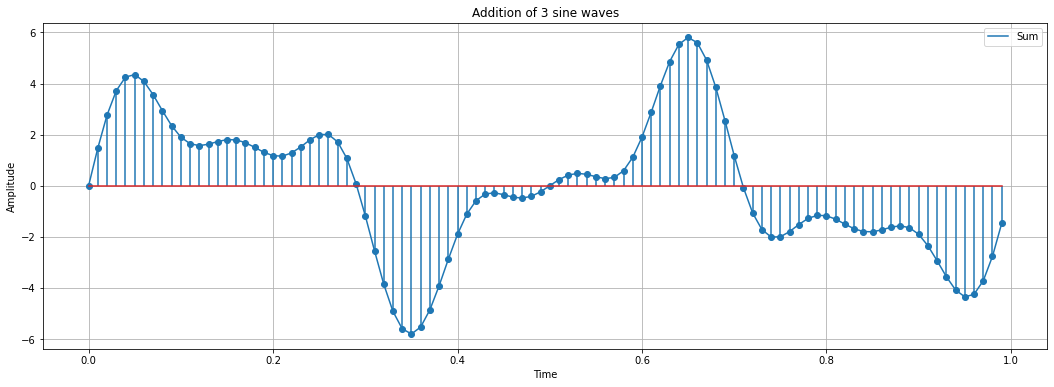

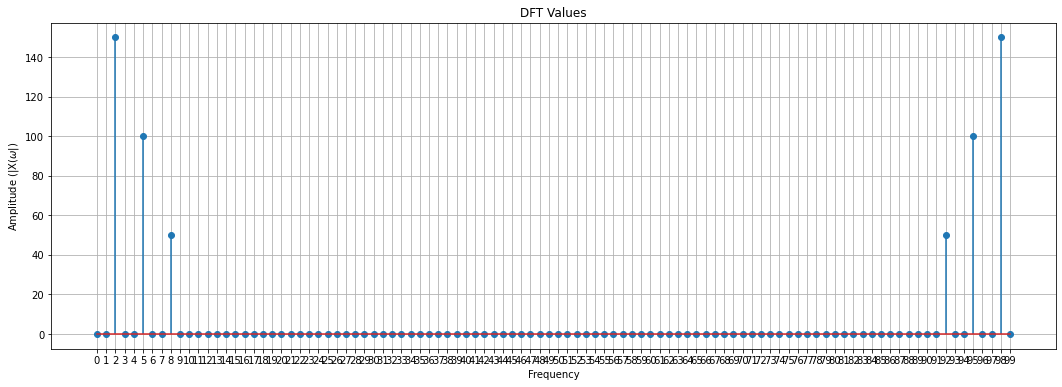

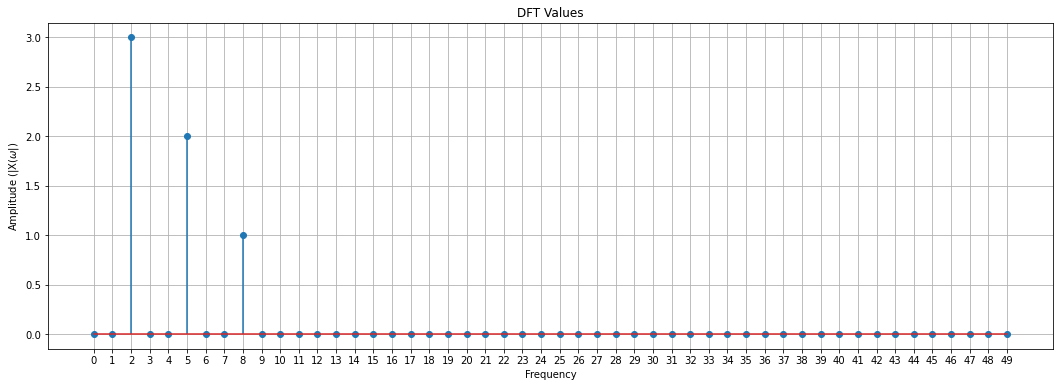

In [9]:

#fn for DFT
def DFT(x):
    N=len(x)
    n=np.arange(N)
    k=n.reshape((N,1))
    e=np.exp(np.complex(0,-2)*np.pi*k*n/N)
    X=np.dot(e,x)
    return X

#fn for diff amp and f
def sinefun(f,amp):
    return amp*np.sin(2*np.pi*f*t1)

#variables
fs=100
ts1=1/fs
t1=np.arange(0,1,ts1)

#cal sine waves
sine1=sinefun(2,3)
sine2=sinefun(5,2)
sine3=sinefun(8,1)
sine_sum=sine1+sine2+sine3

#DFT 
Xsin=DFT(sine_sum)
Nsin=len(Xsin)
nsin=np.arange(Nsin)
Tsin=Nsin/fs
freq=nsin/Tsin

#filtering
no=Nsin//2
fo=freq[:no]
Xo=Xsin[:no]/no

#plotting 3 sine waves
plt.figure(figsize=(18,6))
plt.plot(t1,sine1,label='(f=2Hz,A=3)')
plt.plot(t1,sine2,label='(f=5Hz,A=2)')
plt.plot(t1,sine3,label='(f=8Hz,A=1)')
plt.stem(t1,sine1)
plt.stem(t1,sine2)
plt.stem(t1,sine3)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine wave') 
plt.legend()
plt.show()

#plotting sum sine wave
plt.figure(figsize=(18,6))
plt.plot(t1,sine_sum,label='Sum')
plt.stem(t1,sine_sum)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Addition of 3 sine waves')
plt.legend()
plt.grid()
plt.show()

#plotting DFT
plt.figure(figsize=(18,6))
plt.stem(freq,abs(Xsin))
plt.xlabel('Frequency')
plt.ylabel('Amplitude (|X($\omega$|)')
plt.title('DFT Values')
plt.xticks(np.arange(0,fs,1))
plt.grid()
plt.show()

#plotting filetered 
plt.figure(figsize=(18,6))
plt.stem(fo,abs(Xo))
plt.xlabel('Frequency')
plt.ylabel('Amplitude (|X($\omega$|)')
plt.title('DFT Values')
plt.xticks(np.arange(0,fs/2,1))
plt.grid()
plt.show()

#### It is clear from below plot that DFT values is symmetric about half the sampling frequency

## Q7
#### (a) Generate a sinewave of 100 Hz for 1 sec duration. Choose sampling rate, fs = 200 Hz.
#### (b) Find its true spectrum.
#### (c) Generate rectangular windows of length 80 and 160 samples.
#### (d) Plot the two window functions in time and frequency domains. Note down your observations about main lobe, side lobe, and other factors which you may observe
#### (e) Multiply sinewave using rectangular window of duration 80 samples. Compute the DFT spectrum and note down your observation on obtained spectrum by comparing it with true spectrum in (b).
#### (f) Multiply sinewave using rectangular window of duration 160 samples. Compute the DFT spectrum and note down your observation on obtained spectrum by comparing it with true spectrum in (b).

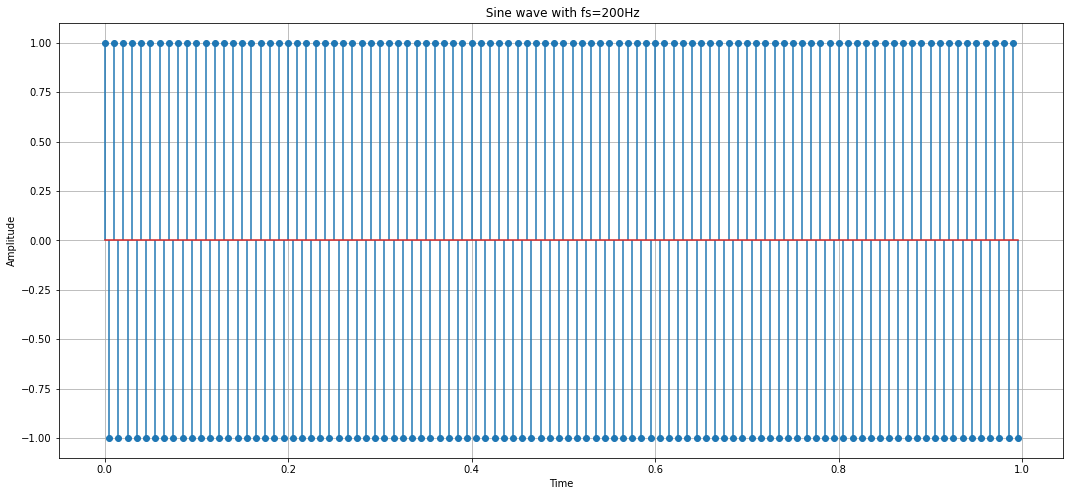

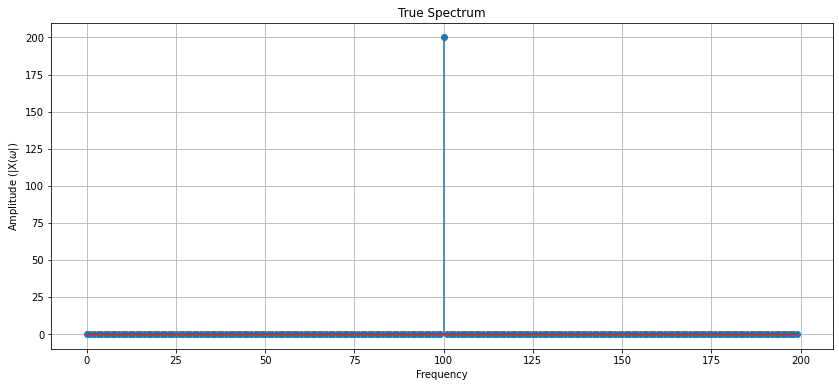

In [10]:
q7_f = 100
q7_fs = 200 #sampling freq
q7_ts=1/q7_fs
q7_t = np.arange(0,1,q7_ts)
q7_sine = np.cos(2 * pi * q7_f* q7_t)#2(pi*f)/(fs)


#plotting
plt.figure(figsize=(18,8))
plt.stem(q7_t,q7_sine)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(' Sine wave with fs=200Hz')
plt.grid()
plt.show()


q7_DFTsine = DFT(q7_sine)
# Calculating frequency values 
q7_freq_val = np.arange(len(q7_sine))
plt.figure(figsize=(14,6))
plt.stem(q7_freq_val,abs(q7_DFTsine))
plt.xlabel('Frequency')
plt.ylabel('Amplitude (|X($\omega$|)')
plt.title('True Spectrum')
plt.grid()
plt.show()



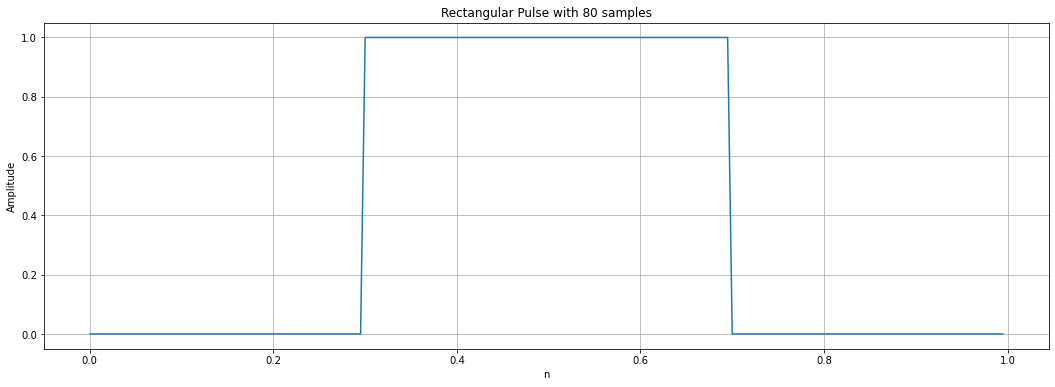

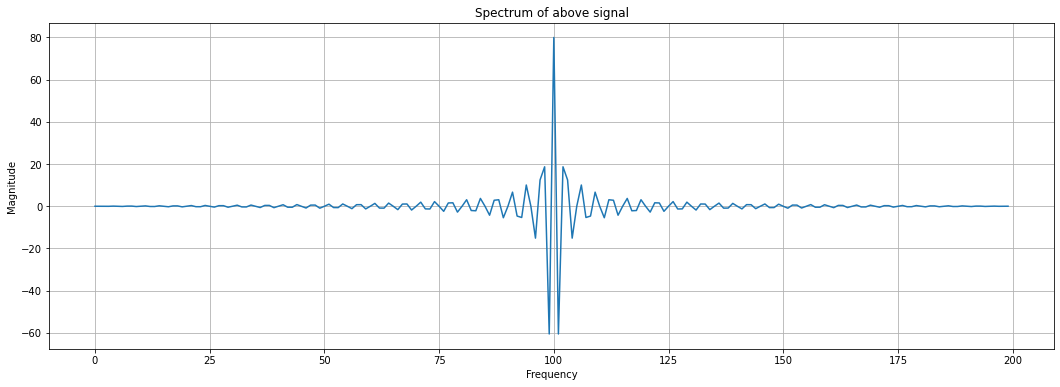

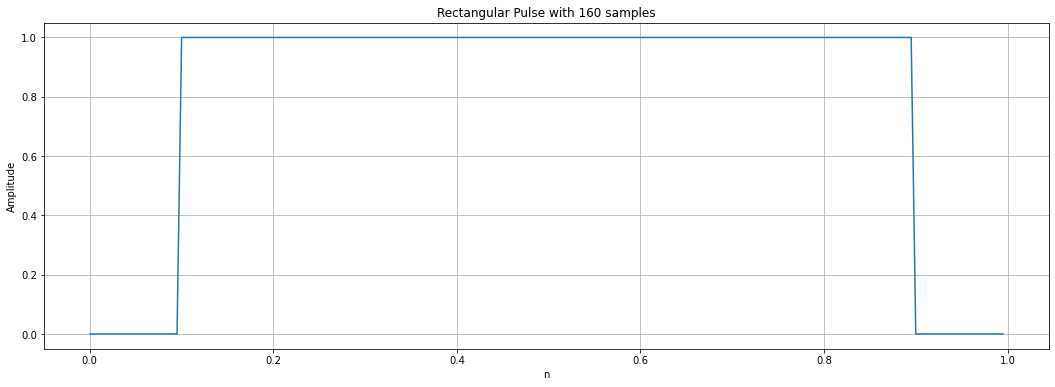

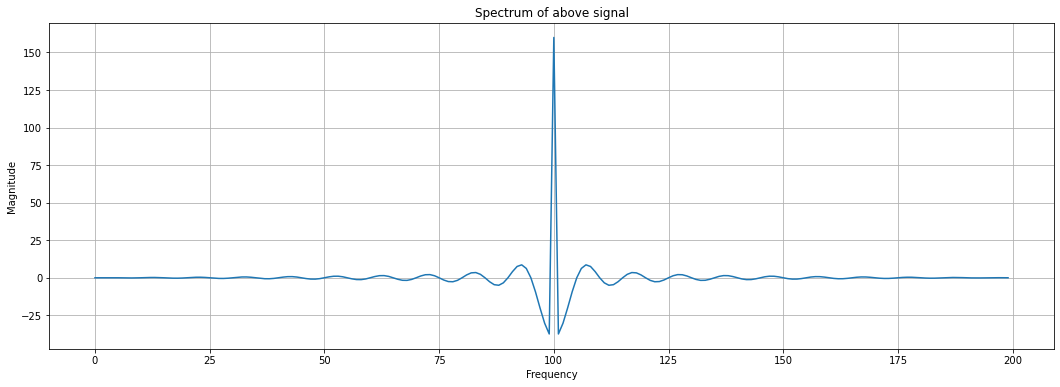

In [11]:
from scipy.fft import fft,fftfreq
# Generating rectangular windows of 80 and 160 samples
sam_rate=200
rect_n = np.arange(0,1,1/sam_rate)
rect1 = np.pad(np.ones(80),(60,60),'constant', constant_values = (0,0))
rect2 = np.pad(np.ones(160),(20,20),'constant', constant_values = (0,0))

# Shifting the DFT result, to make the center the half the sampling frequency,
#for better observation of result
rect_DFT1 = np.fft.fftshift(DFT(rect1))
rect_DFT2 = np.fft.fftshift(DFT(rect2))
#plotting
plt.figure(figsize=(18,6))
plt.plot(rect_n,rect1)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Rectangular Pulse with 80 samples')
plt.grid()
plt.show()


plt.figure(figsize=(18,6))
plt.plot((rect_DFT1.real))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Spectrum of above signal')
plt.grid()
plt.show()

plt.figure(figsize=(18,6))
plt.plot(rect_n,rect2)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Rectangular Pulse with 160 samples')
plt.grid()
plt.show()

plt.figure(figsize=(18,6))
plt.plot((rect_DFT2.real))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Spectrum of above signal')
plt.grid()
plt.show()

#### Main width of main lobe is dependent of number of samples taken, more the number of samples smaller the width of main lobe,side lobes are symmetric about centre

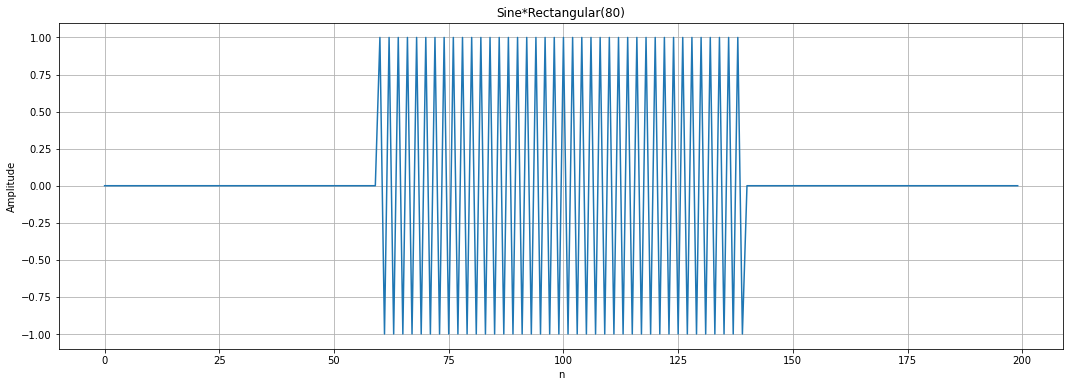

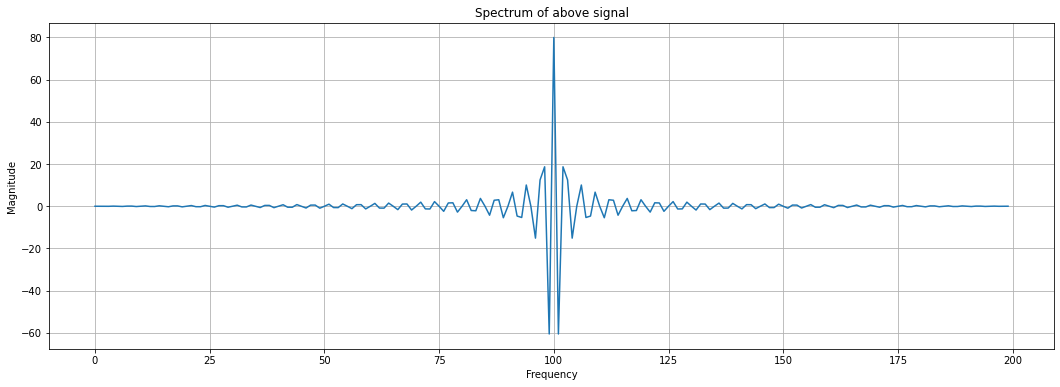

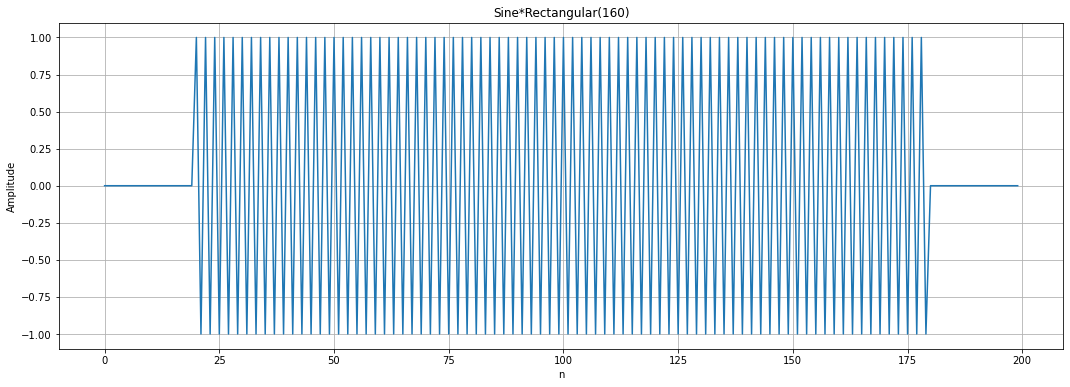

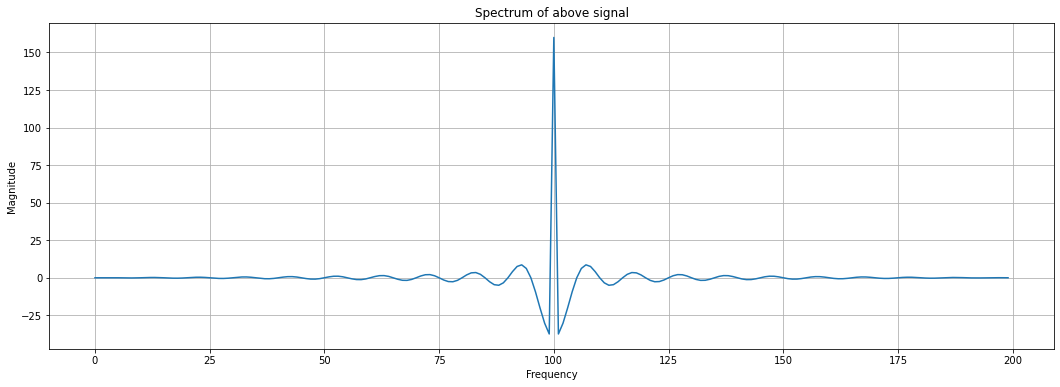

In [12]:
sine_rect1 = np.multiply(q7_sine,rect1)
sine_rect2 = np.multiply(q7_sine,rect2)

sine_rect_DFT1 = DFT(sine_rect1)
sine_rect_DFT2 = DFT(sine_rect2)

#Sine*Rectangular(80)
plt.figure(figsize=(18,6))
plt.plot(sine_rect1)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Sine*Rectangular(80)')
plt.grid()
plt.show()

#plotting Spectra
plt.figure(figsize=(18,6))
#plt.subplot(122)
plt.plot((sine_rect_DFT1.real))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Spectrum of above signal')
plt.grid()
plt.show()

#plotting Sine*Rectangular(160) and spectrum
plt.figure(figsize=(18,6))
plt.plot(sine_rect2)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Sine*Rectangular(160)')
plt.grid()
plt.show()
plt.figure(figsize=(18,6))
plt.plot((sine_rect_DFT2.real))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Spectrum of above signal')
plt.grid()
plt.show()

#### Comparing it to True spectrum of part2,we can see that there is a impulse at 100 Hz (which is frequency component present in original sine wave) and here it is smoother,More the width of window less the main lobe span

#### THE END